In [101]:
import numpy as np
import pandas as pd
import plotnine as p9


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [102]:
ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")

In [103]:
print(ha.head())

                       Name  age  sex  cp  ...  chol  restecg  thalach   diagnosis
0           Magnolia Cassin   60    1   1  ...   230        1      160  No Disease
1     Dr. Cathern Heathcote   60    0   3  ...   318        1      160     Disease
2                Miles Wolf   62    0   3  ...   263        1       97  No Disease
3             Mikaila Block   43    1   1  ...   303        1      181     Disease
4  Mrs. Jacquline Marquardt   66    1   1  ...   302        0      151     Disease

[5 rows x 9 columns]


In [104]:
print(ha.describe())

              age         sex          cp  ...        chol     restecg     thalach
count  204.000000  204.000000  204.000000  ...  204.000000  204.000000  204.000000
mean    53.813725    0.666667    2.049020  ...  248.377451    0.558824  149.147059
std      9.354781    0.472564    1.030352  ...   53.176624    0.526603   23.990925
min     29.000000    0.000000    1.000000  ...  126.000000    0.000000   71.000000
25%     46.000000    0.000000    1.000000  ...  212.750000    0.000000  132.000000
50%     54.000000    1.000000    2.000000  ...  241.000000    1.000000  153.500000
75%     61.000000    1.000000    3.000000  ...  276.250000    1.000000  166.250000
max     77.000000    1.000000    4.000000  ...  564.000000    2.000000  202.000000

[8 rows x 7 columns]


In [105]:
print(ha.nunique())

Name         204
age           40
sex            2
cp             4
trtbps        42
chol         128
restecg        3
thalach       84
diagnosis      2
dtype: int64


In [106]:
# Null values per column
print(ha.isnull().sum())

Name         0
age          0
sex          0
cp           0
trtbps       0
chol         0
restecg      0
thalach      0
diagnosis    0
dtype: int64


In [107]:
ha['diagnosis_numeric'] = ha['diagnosis'].map({'No Disease': 0, 'Disease': 1})


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [108]:
X = ha[['age', 'chol']]
y = ha['diagnosis_numeric']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
model = LogisticRegression()

model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [111]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5365853658536586

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.60      0.62      0.61        24

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41


Confusion Matrix:
[[ 7 10]
 [ 9 15]]


In [112]:
# Extract the intercept and coefficients
intercept_log = model.intercept_[0]
coefs_log = model.coef_[0]



# Age is fixed at 55
age = 55

print(intercept_log)

print(coefs_log)


3.3352343331261287
[-0.04477063 -0.00283207]


In [113]:
# --- Question 1: Cholesterol level for 50% probability (the decision boundary) ---
chol_log_50 = (-intercept_log - (coefs_log[0] * age)) / coefs_log[1]

print(f"Logistic Regression:")
print(f"For a 55-year-old to be on the decision boundary (50% probability), their cholesterol would need to be approximately: {chol_log_50}")



Logistic Regression:
For a 55-year-old to be on the decision boundary (50% probability), their cholesterol would need to be approximately: 308.20189872383236


In [114]:
# --- Question 2: Cholesterol level for 90% probability ---
# P=0.9 -> logit = ln(0.9/0.1) = ln(9)
chol_log_90 = (np.log(9) - intercept_log - (coefs_log[0] * age)) / coefs_log[1]

print(f"For a 90% chance of heart disease, their cholesterol would need to be approximately: {chol_log_90}\n")

For a 90% chance of heart disease, their cholesterol would need to be approximately: -467.6345322496071



## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [115]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [116]:
y_pred = lda_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5365853658536586

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.60      0.62      0.61        24

    accuracy                           0.54        41
   macro avg       0.52      0.52      0.52        41
weighted avg       0.53      0.54      0.53        41


Confusion Matrix:
[[ 7 10]
 [ 9 15]]


In [117]:
intercept_lda = lda_model.intercept_[0]
coefs_lda = lda_model.coef_[0]

print(intercept_lda)

print(coefs_lda)


3.29721706128592
[-0.04440064 -0.00275855]


In [118]:
# --- Question: Cholesterol level for the decision boundary ---
chol_lda = (-intercept_lda - (coefs_lda[0] * age)) / coefs_lda[1]

print(f"Linear Discriminant Analysis:")
print(f"For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: {chol_lda}\n")

Linear Discriminant Analysis:
For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: 310.0118409369911



## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [119]:
# svc_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('svc', SVC(kernel='linear'))
# ])

svc_model = SVC(kernel='linear')

svc_model.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [120]:
y_pred = svc_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5853658536585366

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51        17
           1       0.65      0.62      0.64        24

    accuracy                           0.59        41
   macro avg       0.58      0.58      0.58        41
weighted avg       0.59      0.59      0.59        41


Confusion Matrix:
[[ 9  8]
 [ 9 15]]


In [121]:
coef_svc = svc_model.coef_[0]
intercept_svc = svc_model.intercept_[0]

print(coef_svc)
print(intercept_svc)


[-0.07168393 -0.00428878]
5.172100697702974


In [122]:
# --- Question: Cholesterol level for the decision boundary ---
chol_svc = (-intercept_svc - (coef_svc[0] * age)) / coef_svc[1]

print(f"Support Vector Classifier:")
print(f"For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: {chol_svc}\n")

Support Vector Classifier:
For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: 286.6745230456195



## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [123]:
x_min, x_max = X['age'].min(), X['age'].max()
ages_for_plot = np.linspace(x_min, x_max, 300)

In [124]:
chol_log_line = (-intercept_log - coefs_log[0] * ages_for_plot) / coefs_log[1]
chol_lda_line = (-intercept_lda - coefs_lda[0] * ages_for_plot) / coefs_lda[1]
chol_svc_line = (-intercept_svc - coef_svc[0] * ages_for_plot) / coef_svc[1]

In [125]:
print(chol_log_line)
print(chol_lda_line)
print(chol_svc_line)

[719.22121081 716.68340183 714.14559286 711.60778388 709.06997491
 706.53216593 703.99435695 701.45654798 698.918739   696.38093003
 693.84312105 691.30531207 688.7675031  686.22969412 683.69188514
 681.15407617 678.61626719 676.07845822 673.54064924 671.00284026
 668.46503129 665.92722231 663.38941334 660.85160436 658.31379538
 655.77598641 653.23817743 650.70036846 648.16255948 645.6247505
 643.08694153 640.54913255 638.01132358 635.4735146  632.93570562
 630.39789665 627.86008767 625.32227869 622.78446972 620.24666074
 617.70885177 615.17104279 612.63323381 610.09542484 607.55761586
 605.01980689 602.48199791 599.94418893 597.40637996 594.86857098
 592.33076201 589.79295303 587.25514405 584.71733508 582.1795261
 579.64171713 577.10390815 574.56609917 572.0282902  569.49048122
 566.95267224 564.41486327 561.87705429 559.33924532 556.80143634
 554.26362736 551.72581839 549.18800941 546.65020044 544.11239146
 541.57458248 539.03677351 536.49896453 533.96115556 531.42334658
 528.8855376

In [126]:
df_boundaries = pd.DataFrame({
    'age': np.concatenate([ages_for_plot, ages_for_plot, ages_for_plot]),
    'chol': np.concatenate([chol_log_line, chol_lda_line, chol_svc_line]),
    'Model': ['Logistic Regression'] * 300 + ['LDA'] * 300 + ['SVC'] * 300
})


In [127]:
ha_plot = ha.dropna(subset=['diagnosis', 'diagnosis_numeric'])


In [128]:
plot = (
    p9.ggplot(ha_plot, p9.aes(x='age', y='chol', color='diagnosis'))
    + p9.geom_point(alpha=0.7, size=2)
    + p9.geom_line(
        data=df_boundaries,
        mapping=p9.aes(x='age', y='chol', linetype='Model', color=None),
        size=1.2
    )
    + p9.scale_color_manual(values={'No Disease': "#3498db", 'Disease': "#e74c3c"}, name="Diagnosis")
    + p9.scale_linetype_manual(values=["solid", "dashed", "dotted"], name="Model Boundary")
    + p9.labs(
        title="Decision Boundaries: Logistic Regression vs. LDA vs. Linear SVC",
        x="Age (years)",
        y="Cholesterol (mg/dL)"
    )
    + p9.theme_minimal()
)

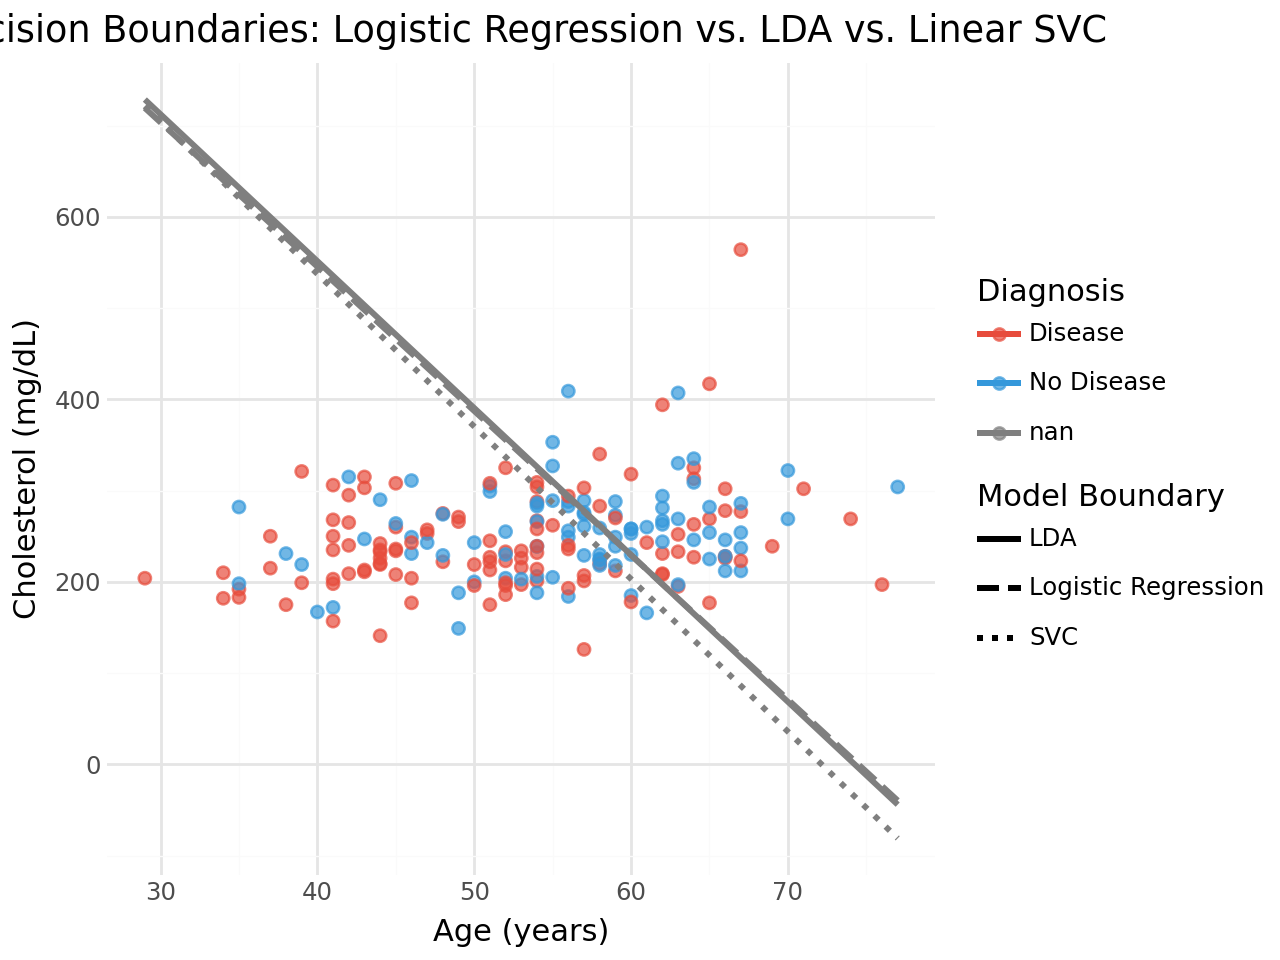

In [129]:
plot.show()